### Look at what happens to units during stim onset, if it's modulated by confidence

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils
import utils.behavioral_utils as behavioral_utils

import os
import pandas as pd
import matplotlib

In [2]:
sess_name = 20180802

In [12]:
FEATURE_DIMS = ["Color", "Shape", "Pattern"]
OUTPUT_DIR = "/data/patrick_res/information"

SESSIONS_PATH = "/data/patrick_res/multi_sess/valid_sessions_rpe.pickle"
SESS_BEHAVIOR_PATH = "/data/rawdata/sub-SA/sess-{sess_name}/behavior/sub-SA_sess-{sess_name}_object_features.csv"

# PRE_INTERVAL = 500
# POST_INTERVAL = 500
# INTERVAL_SIZE = 100
# SMOOTH = 1
# EVENT = "StimOnset"

PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
SMOOTH = 1
EVENT = "FeedbackOnset"
fr_path = f"/data/patrick_res/firing_rates/{sess_name}_firing_rates_{PRE_INTERVAL}_{EVENT}_{POST_INTERVAL}_{INTERVAL_SIZE}_bins_{SMOOTH}_smooth.pickle"


In [13]:
behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=sess_name)
beh = pd.read_csv(behavior_path)

# filter trials 
valid_beh = behavioral_utils.get_valid_trials(beh)
feature_selections = behavioral_utils.get_selection_features(valid_beh)
valid_beh = pd.merge(valid_beh, feature_selections, on="TrialNumber")
valid_beh_rpes = behavioral_utils.get_rpes_per_session(sess_name, valid_beh)

In [14]:
med = valid_beh_rpes.Prob_FE.median()
print(f"median {med}")

# add median labels to 
def add_group(row):
    confidence = row.Prob_FE
    group = None
    if confidence < med:
        group = "low confidence"
    elif confidence >= med:
        group = "high confidence"
    row["ConfidenceGroup"] = group
    return row
valid_beh = valid_beh_rpes.apply(add_group, axis=1)

median 0.555364554733573


In [15]:
frs = pd.read_pickle(fr_path)
pos = spike_utils.get_unit_positions_per_sess(sess_name)
pos = spike_utils.get_manual_structure(pos)

/tmp/ipykernel_1080845/2379707199.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


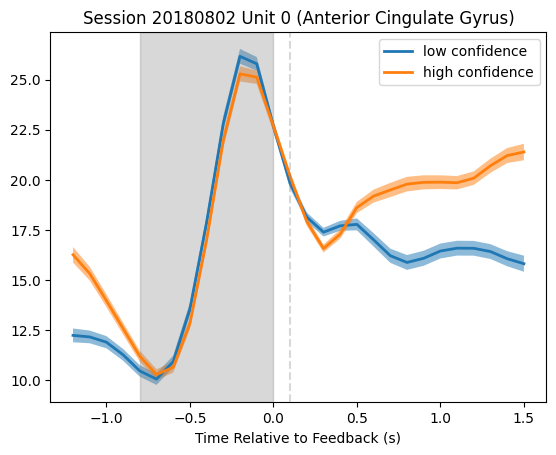

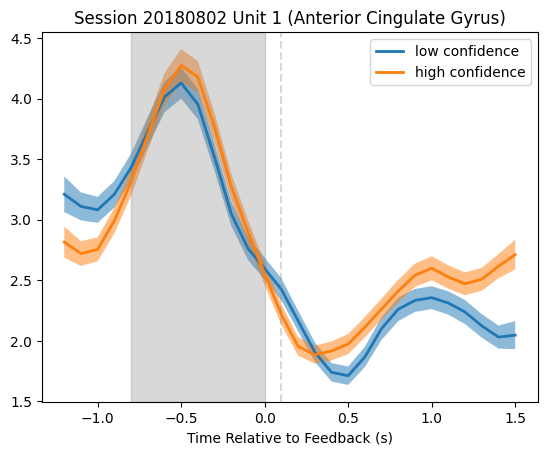

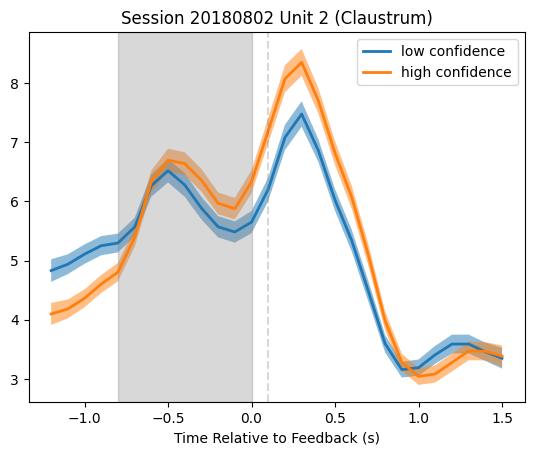

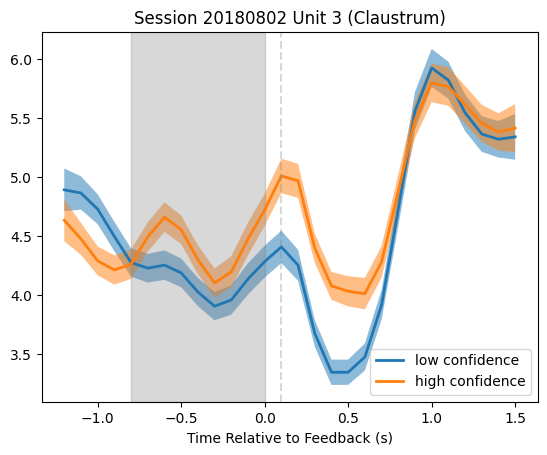

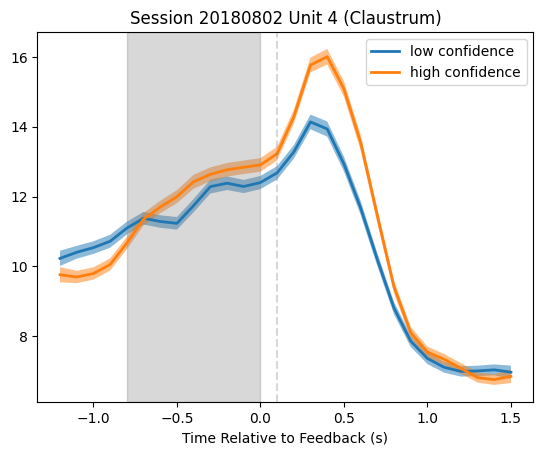

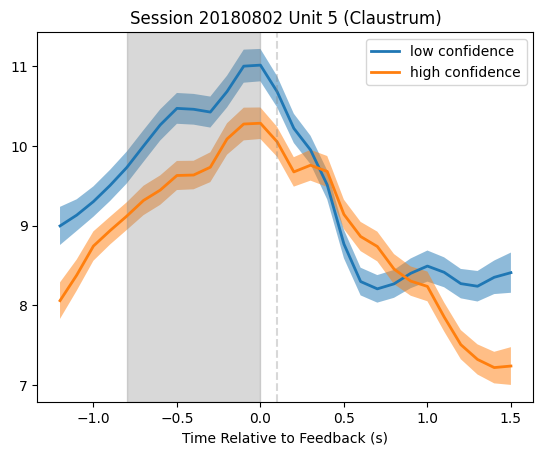

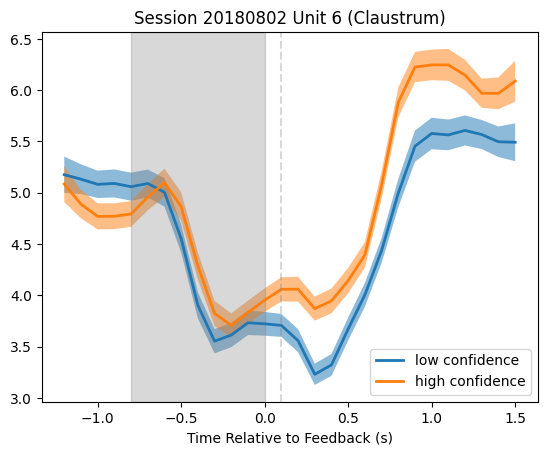

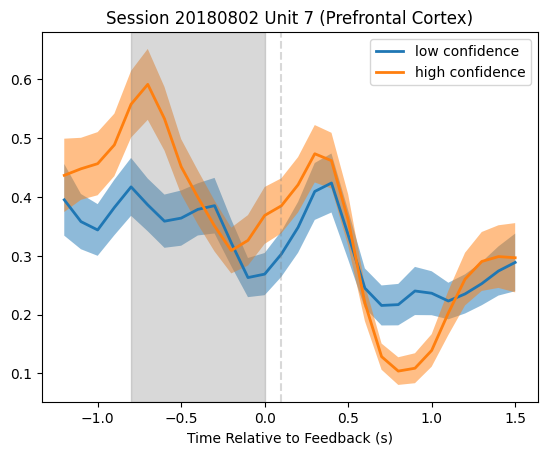

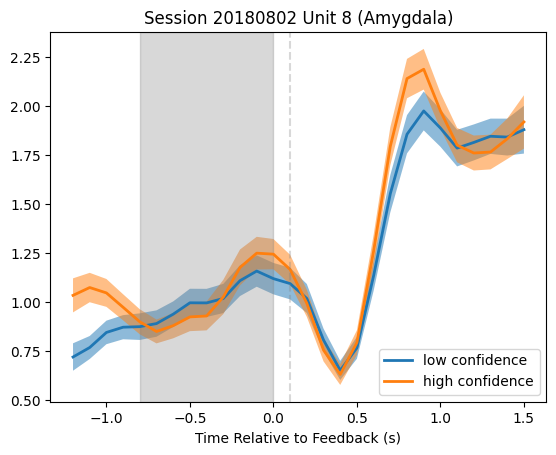

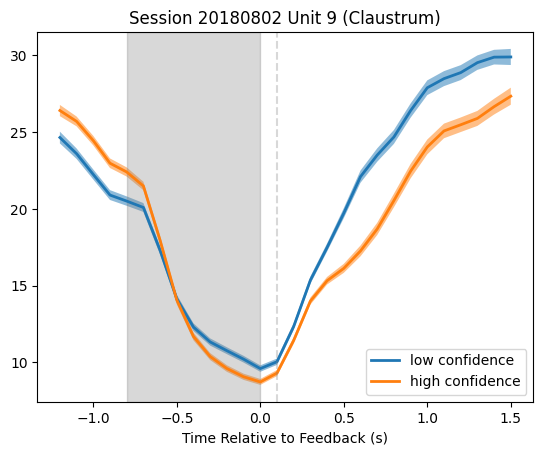

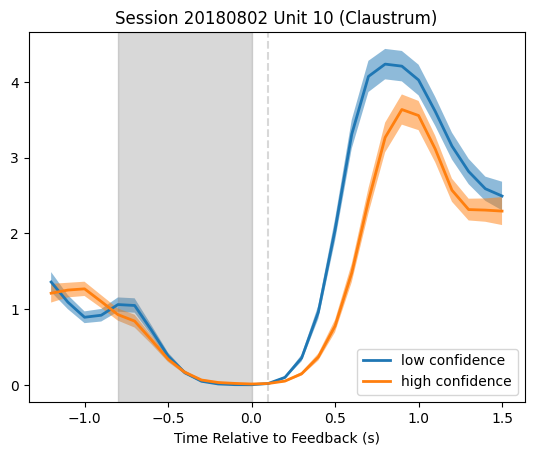

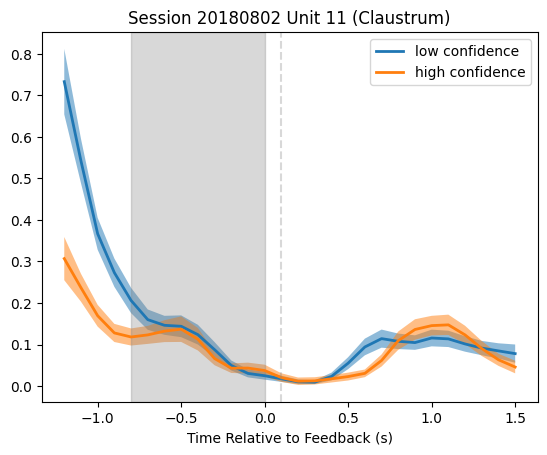

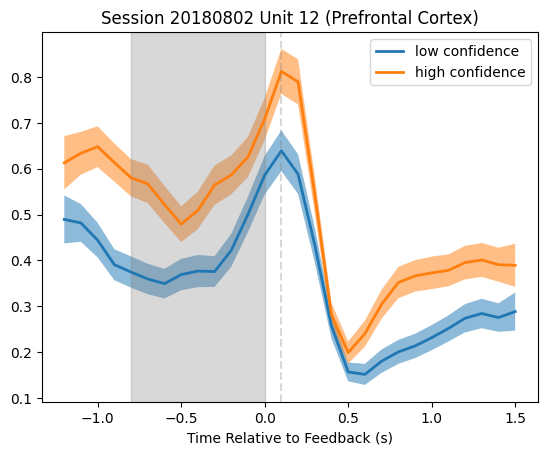

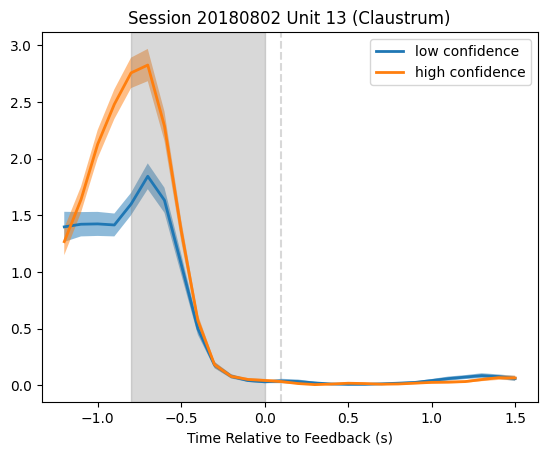

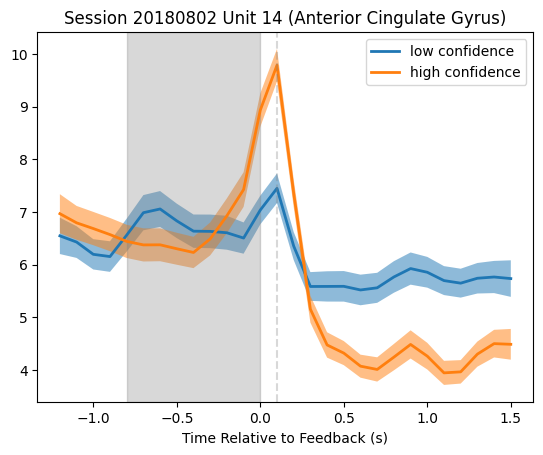

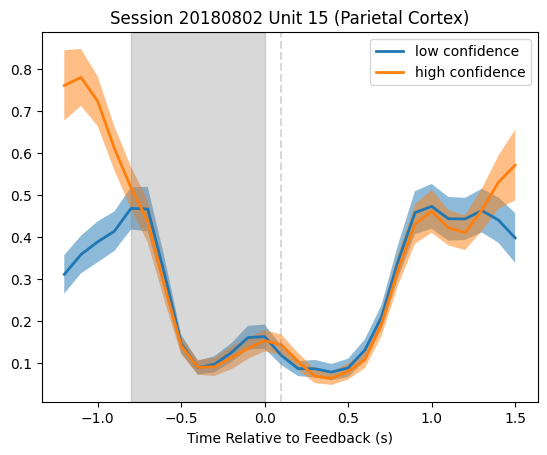

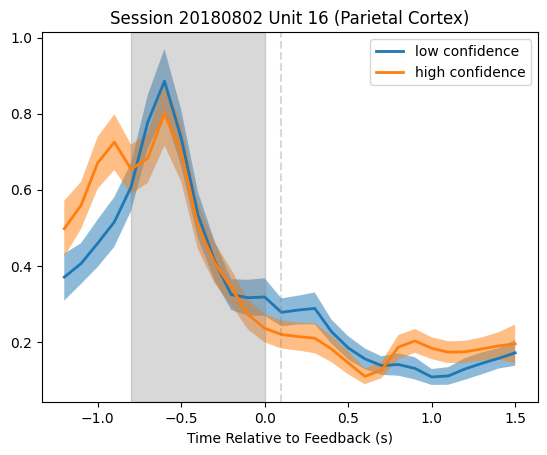

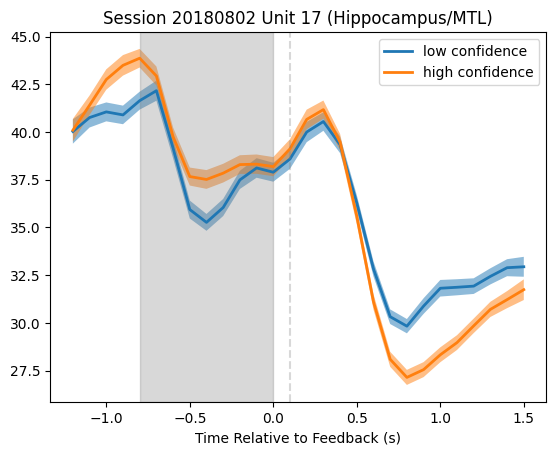

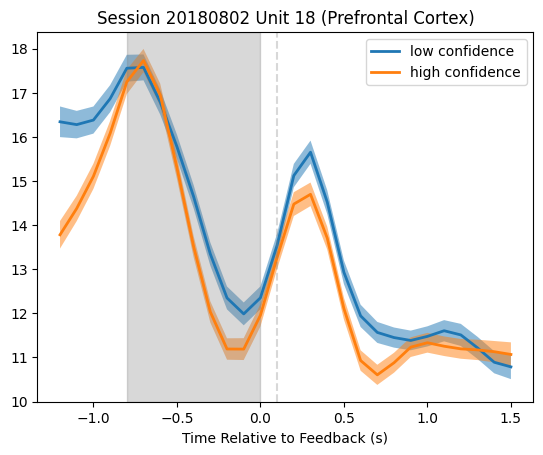

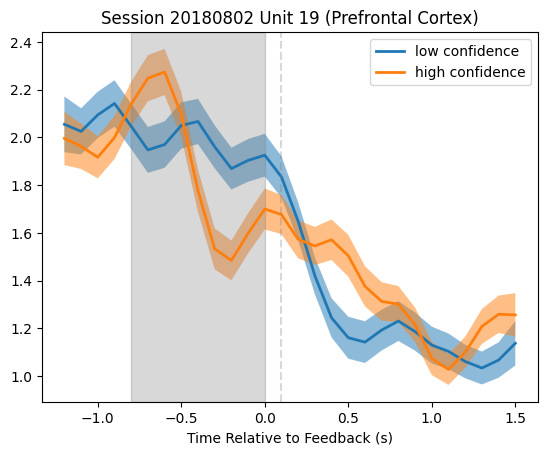

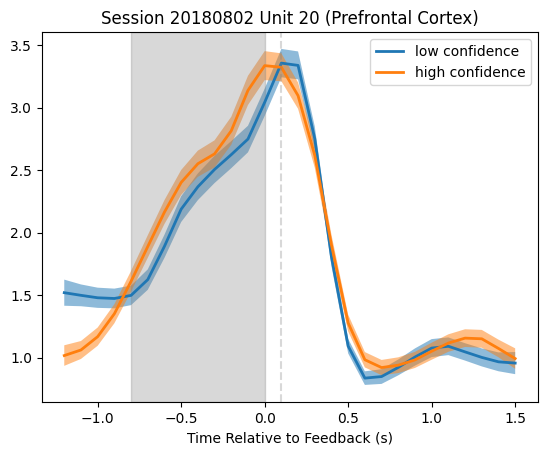

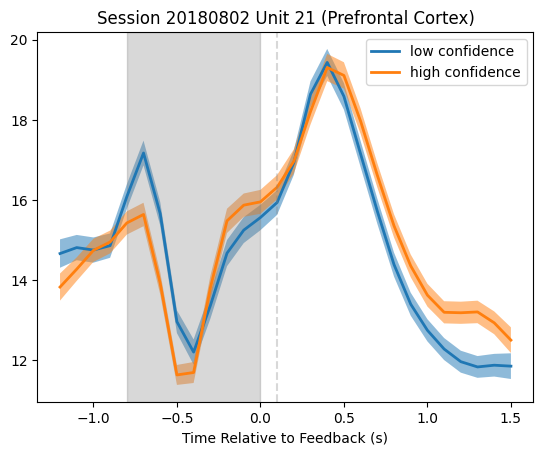

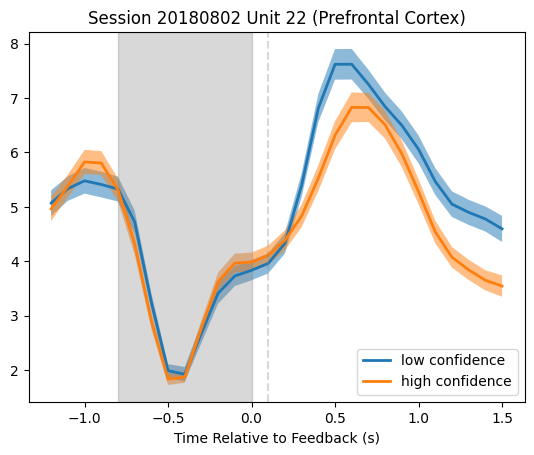

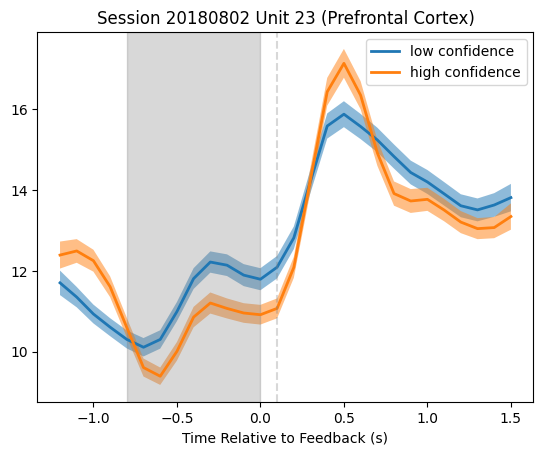

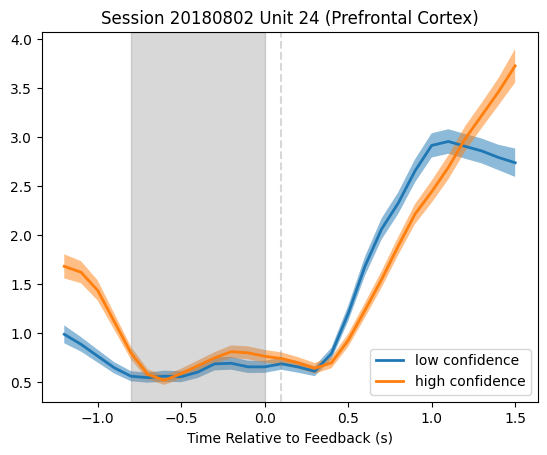

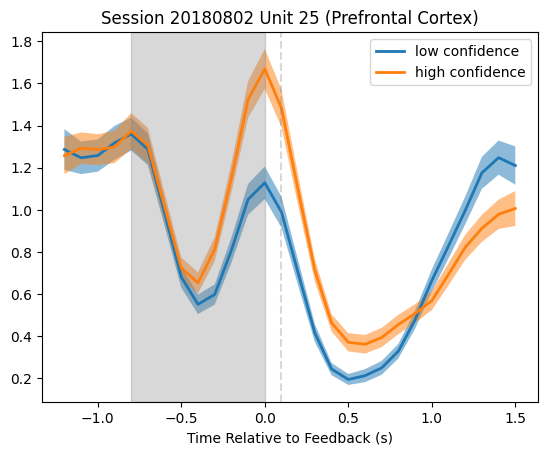

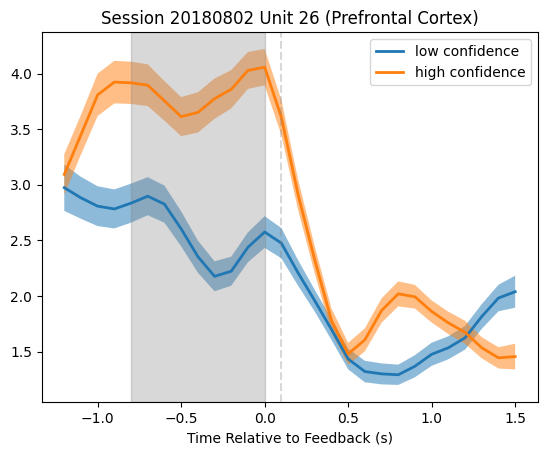

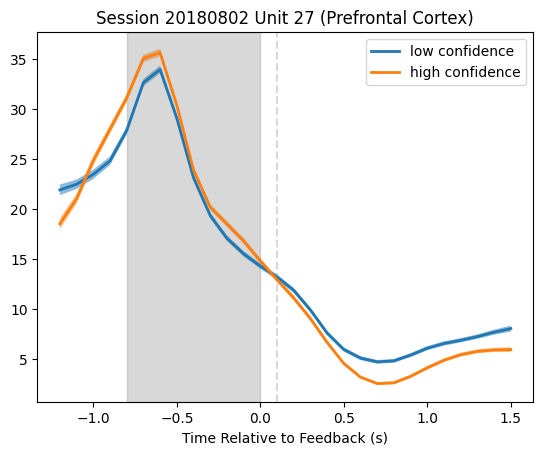

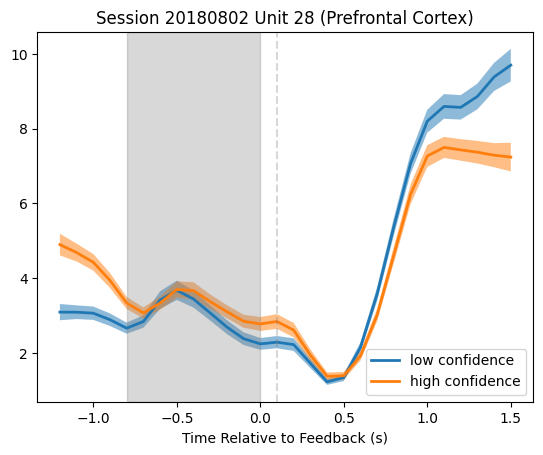

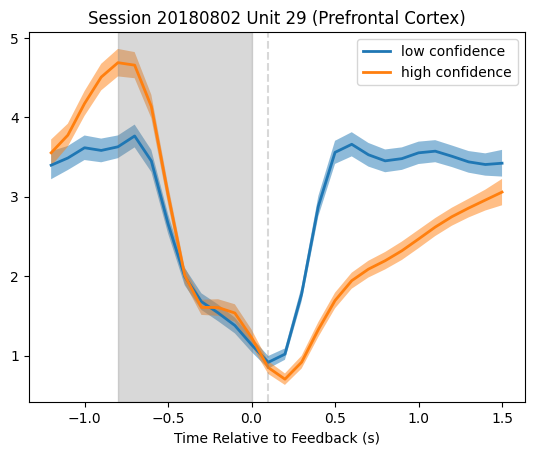

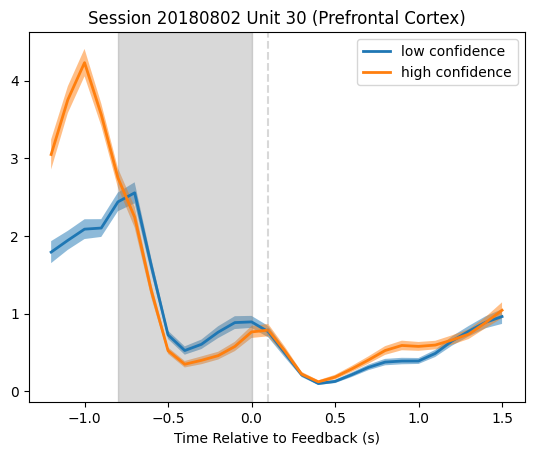

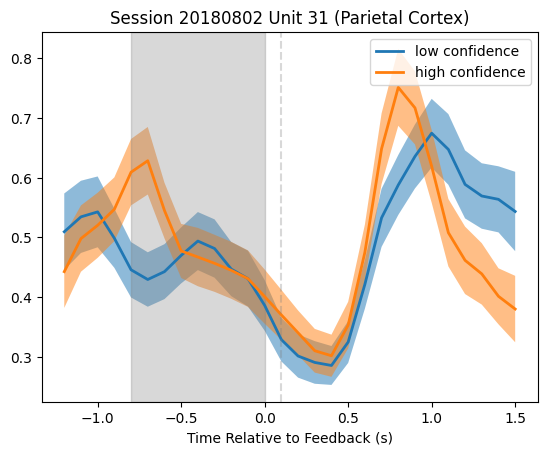

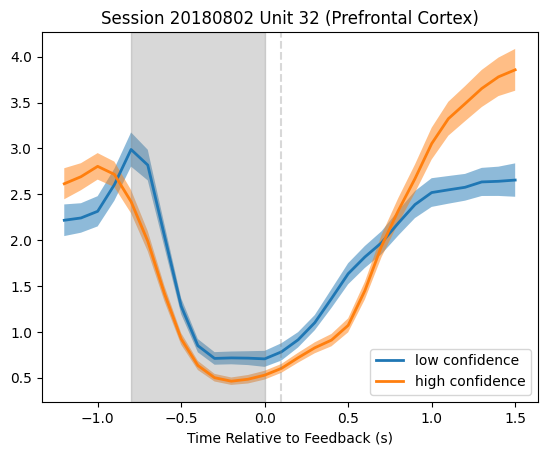

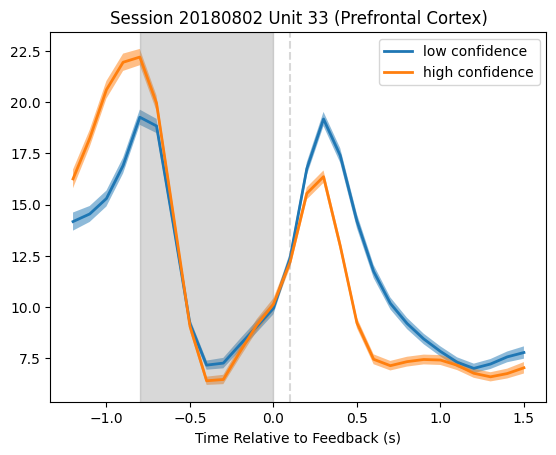

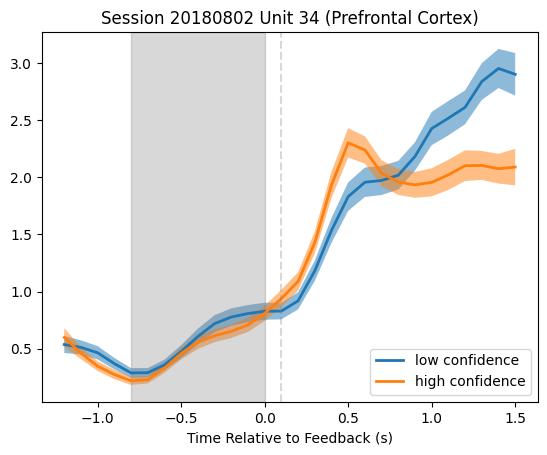

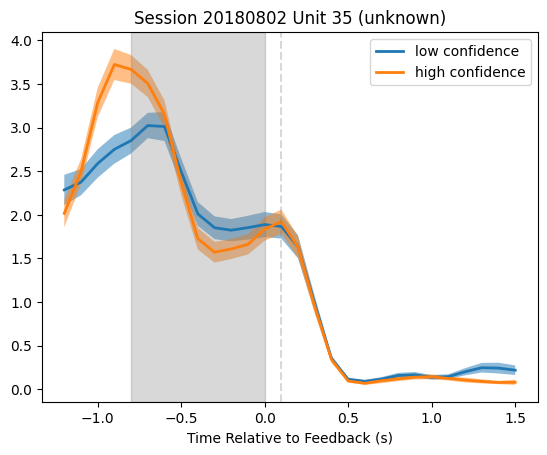

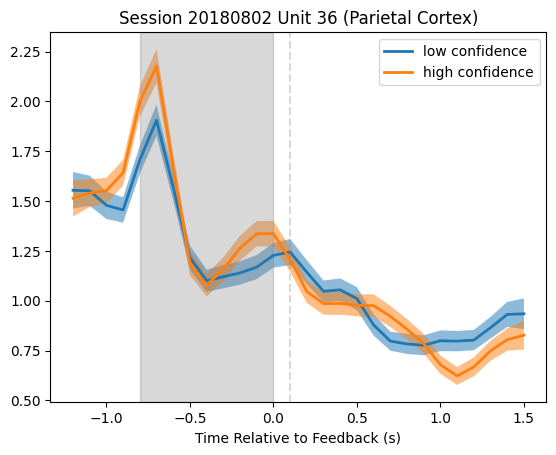

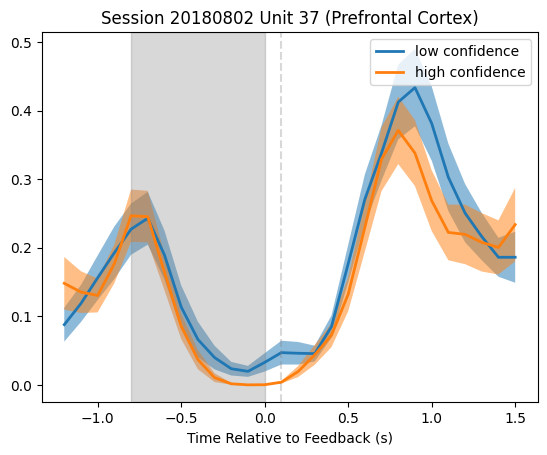

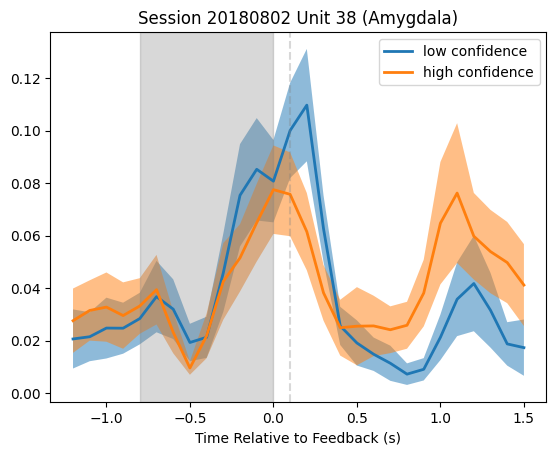

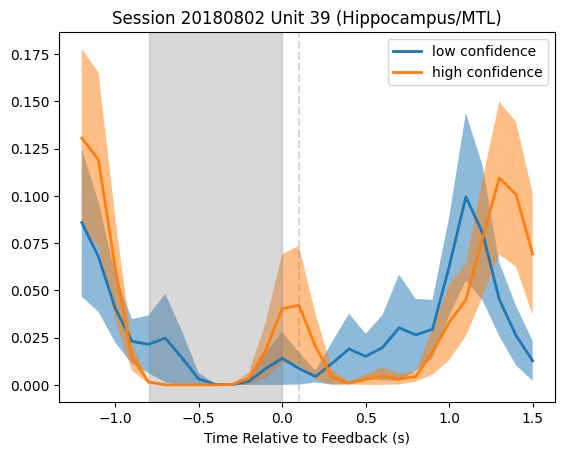

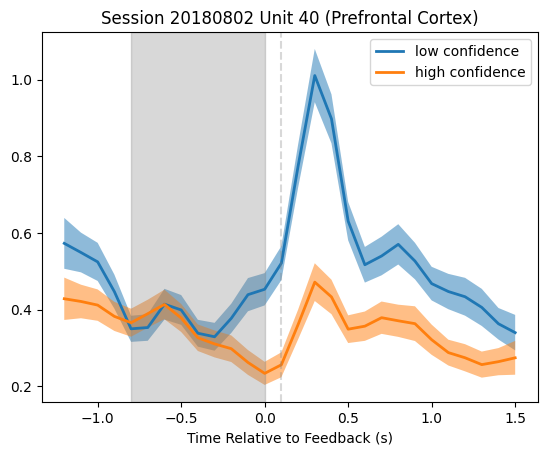

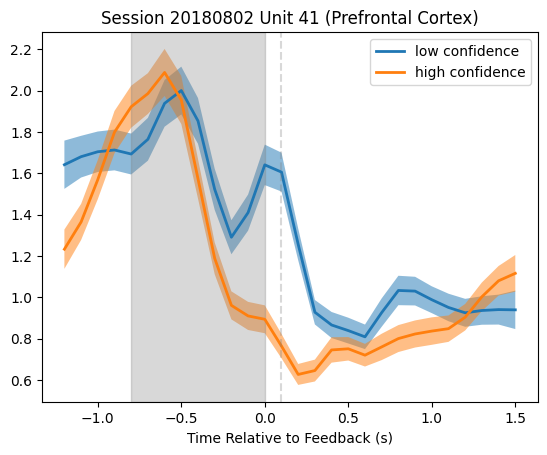

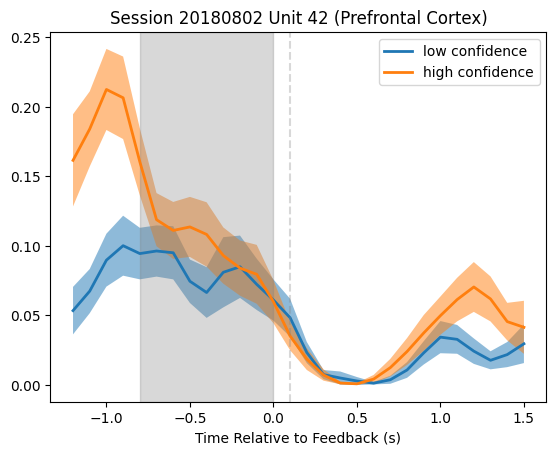

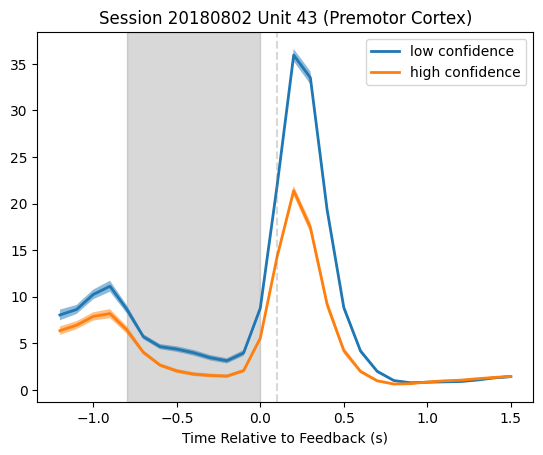

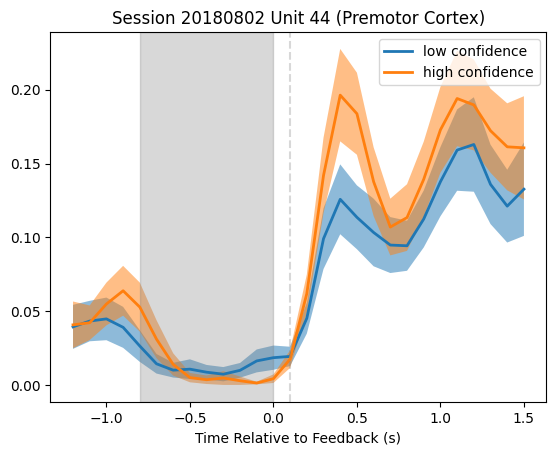

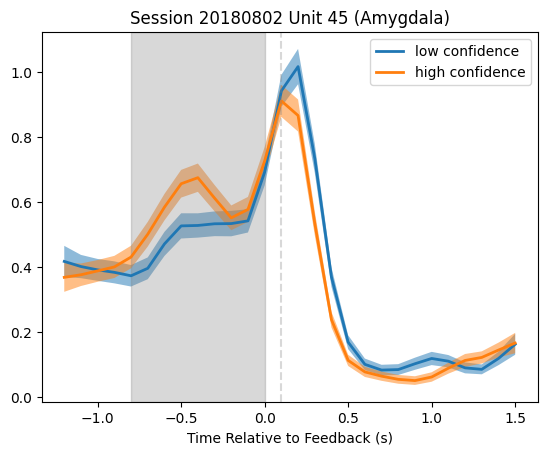

In [16]:
for unit in frs.UnitID.unique():
    fig, ax = plt.subplots()
    # visualization_utils.plot_mean_frs_by_group_stim_on(sess_name, unit, frs, valid_beh, "ConfidenceGroup", pos, ax, mode="FiringRate", group_colors=None)
    visualization_utils.plot_mean_frs_by_group(sess_name, unit, frs, valid_beh, "ConfidenceGroup", pos, ax, mode="FiringRate", group_colors=None)


In [8]:
def process_session(sess_name):
    behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=sess_name)
    beh = pd.read_csv(behavior_path)

    # filter trials 
    valid_beh = behavioral_utils.get_valid_trials(beh)
    valid_beh_rpes = behavioral_utils.get_rpes_per_session(sess_name, valid_beh)
    med = valid_beh_rpes.Prob_FE.median()
    print(f"median {med}")

    # add median labels to 
    def add_group(row):
        confidence = row.Prob_FE
        group = None
        if confidence < med:
            group = "low confidence"
        elif confidence >= med:
            group = "high confidence"
        row["ConfidenceGroup"] = group
        return row
    valid_beh = valid_beh_rpes.apply(add_group, axis=1)
    valid_beh["session"] = sess_name
    return valid_beh
valid_sess = pd.read_pickle(SESSIONS_PATH)
all_trials = pd.concat(valid_sess.apply(lambda x: process_session(x.session_name), axis=1).values)

median 0.6512866712495351
median 0.5270830734688191
median 0.5832654998869615
median 0.5144657836573263
median 0.5153136346090028
median 0.6173320881319182
median 0.5289219583890352
median 0.5620274251816558
median 0.5783318871586659
median 0.5658070387735734
median 0.5259597231657981
median 0.555364554733573
median 0.5699553722335396
median 0.5780969213426643
median 0.5977879832915524
median 0.47928340194042923
median 0.596265284968785
median 0.597638120932944
median 0.5460253599887781
median 0.48522776242833
median 0.5817672615090078
median 0.5261172164290567
median 0.5108637303888581
median 0.5717269686042598
median 0.5776066455075899
median 0.5314050946712221
median 0.5381673360415209


In [10]:
low_conf = all_trials[all_trials.ConfidenceGroup == "low confidence"]

In [14]:
low_conf.to_pickle("/data/patrick_res/low_confidence_trials.pickle")

In [12]:
high_conf = all_trials[all_trials.ConfidenceGroup == "high confidence"]

In [15]:
high_conf.to_pickle("/data/patrick_res/high_confidence_trials.pickle")

In [9]:
cor_trials = all_trials[all_trials.Response == "Correct"]

In [10]:
inc_trials = all_trials[all_trials.Response == "Incorrect"]

In [11]:
len(cor_trials)

16080

In [12]:
len(inc_trials)

11933

In [13]:
cor_trials.to_pickle("/data/patrick_res/cor_trials.pickle")

In [14]:
inc_trials.to_pickle("/data/patrick_res/inc_trials.pickle")